In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist    # A Toy dataset
from tensorflow.keras import Sequential, utils
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

np.random.seed (10) 
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data ( )
print ( '\n train data=', len (x_train_image), '\n\n test data=', len (x_test_image))
print ( '\n x_train_image :', x_train_image.shape)    #x_train_image : (60000, 28, 28)
print ('\n y_train_label :', y_train_label.shape) 


 train data= 60000 

 test data= 10000

 x_train_image : (60000, 28, 28)

 y_train_label : (60000,)


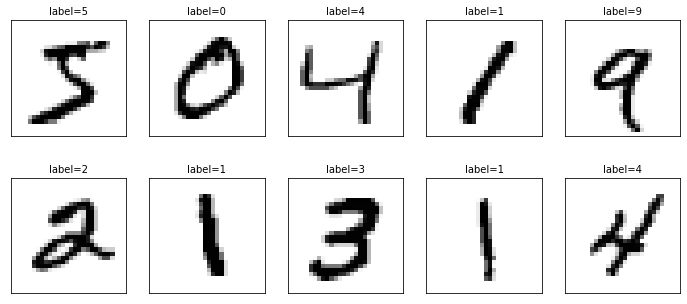

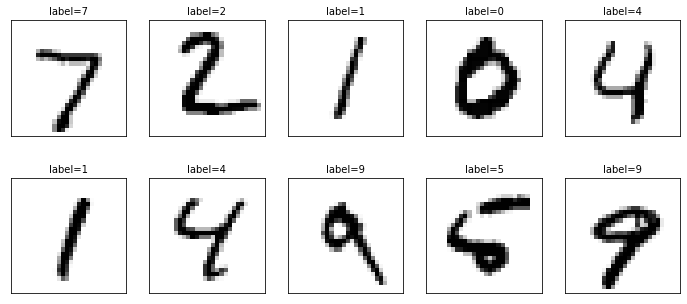

In [3]:
def plot_images_labels (images, labels, idx, num = 10):     #顯示資料集內容
    fig = plt.gcf().set_size_inches (12, 14)
    if num > 25: num = 25 #大於25鎖定在25
    for i in range (0, num): 
        ax = plt.subplot (5, 5, 1+i)   #建立subgraph子圖形為5行5列
        ax.imshow (images[idx], cmap='binary') 
        title = "label=" + str ( labels [idx]) 
        ax.set_title (title, fontsize = 10),  ax.set_xticks ([ ]) ; ax.set_yticks ([ ]) 
        idx += 1 #讀取下一筆
    plt.show( ) 

plot_images_labels (x_train_image, y_train_label, idx=0)
plot_images_labels (x_test_image, y_test_label, idx=0)

In [4]:
x_Train = x_train_image.reshape (60000, 28*28).astype ('float32')/255  # 2維整數轉成1維float
x_Test = x_test_image.reshape (10000, 28*28).astype ('float32')/255

print ('x_train:', x_Train.shape,', x_Test:', x_Test.shape)  #查看轉換為1維向量的shape

x_train: (60000, 784) , x_Test: (10000, 784)


In [6]:
#使用np_utils.to_categorical()，將y_train_label與y_test_label，執行One-hot encoding轉換
y_TrainOneHot = utils.to_categorical (y_train_label)
y_TestOneHot = utils.to_categorical (y_test_label)
print(y_train_label[:5])
print (y_TrainOneHot[:5])     #輸出One-hot encoding轉換結果
print(y_TrainOneHot.shape)

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(60000, 10)


In [38]:
# MLP model
model = Sequential ( )
model.add ( Dense (256, input_dim=28*28, activation='relu') )
model.add ( Dense (10, activation='softmax') )
model.compile (loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary ( )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [39]:
MLP_history=model.fit(x_Train, y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.8364WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x16c7cc700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSIT

In [40]:
oss, accuracy = model.evaluate (x_Test, y_TestOneHot)
print ( 'Accuracy of Testing = %.2f' %accuracy)

313/313 [==============================] - 0s 287us/step - loss: 0.0847 - accuracy: 0.9794
Accuracy of Testing = 0.98


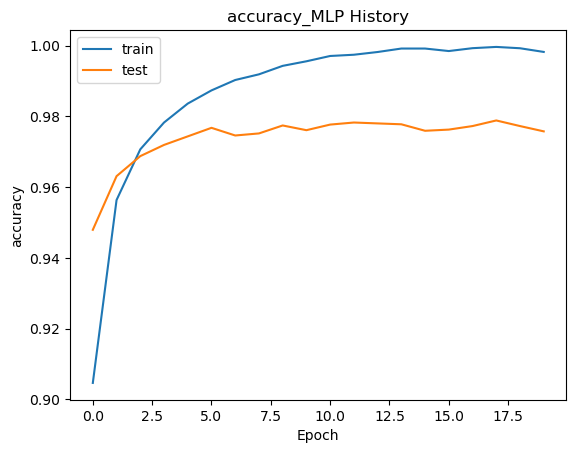

In [41]:
def MLP_train_history(train_acc,test_acc,title,ylabel):
    plt.clf()
    plt.plot(MLP_history.history[train_acc])
    plt.plot(MLP_history.history[test_acc])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
MLP_train_history('accuracy','val_accuracy','accuracy_MLP History','accuracy')

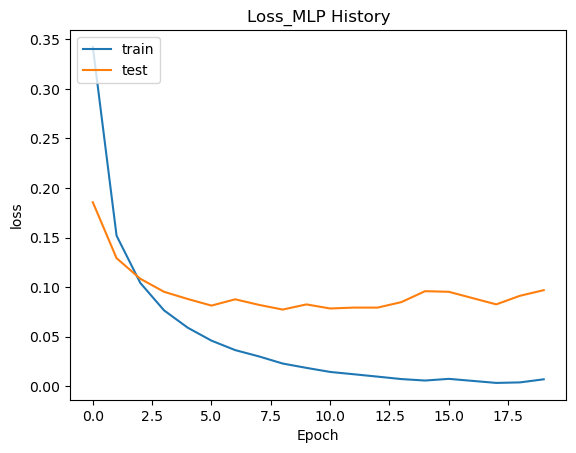

In [42]:
MLP_train_history('loss','val_loss','Loss_MLP History','loss')

In [43]:
#CNN 調整資料格式
x_Train = x_Train.reshape (x_Train.shape[0], 28, 28, 1).astype ('float32')
x_Test = x_Test.reshape (x_Test.shape[0], 28, 28, 1).astype ('float32')
print ('\n y_train_label :', y_train_label.shape) 


 y_train_label : (60000,)


In [44]:
#CNN model
model2 = Sequential  ()
model2.add ( Conv2D (16, kernel_size=(5,5), padding='same', input_shape = (28,28,1),
           activation='relu'))
model2.add (MaxPooling2D (pool_size=(2,2)))

model2.add ( Conv2D (32, kernel_size=(5,5), 
       padding='same', activation='relu' ) )
model2.add ( MaxPooling2D (pool_size=(2,2)))
model2.add ( Dropout (0.5) )
model2.add ( Flatten ( ) )

model2.add ( Dense (128, activation='relu' ) )
model2.add ( Dropout (0.5) )

model2.add ( Dense (10, activation='softmax' ) )

model2.compile ( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary ( )  
             

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [45]:
CNN_history=model2.fit (x_Train, y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 [==============================] - ETA: 0s - loss: 72.0812 - accuracy: 0.5041WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x16c919c10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSI

In [46]:
loss,accuracy = model2.evaluate (x_Test, y_TestOneHot)
print ('Accuracy of Testing = {:.2f}'.format (accuracy))

313/313 [==============================] - 0s 2ms/step - loss: 786.8454 - accuracy: 0.9323
Accuracy of Testing = 0.93


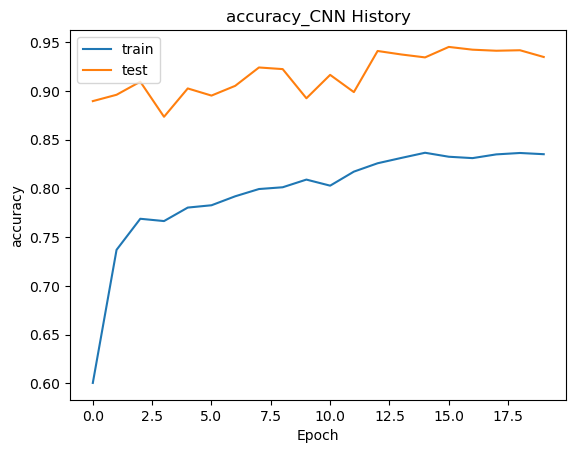

In [47]:
def CNN_train_history(train_acc,test_acc,title,ylabel):
    plt.clf()
    plt.plot(CNN_history.history[train_acc])
    plt.plot(CNN_history.history[test_acc])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
CNN_train_history('accuracy','val_accuracy','accuracy_CNN History','accuracy')

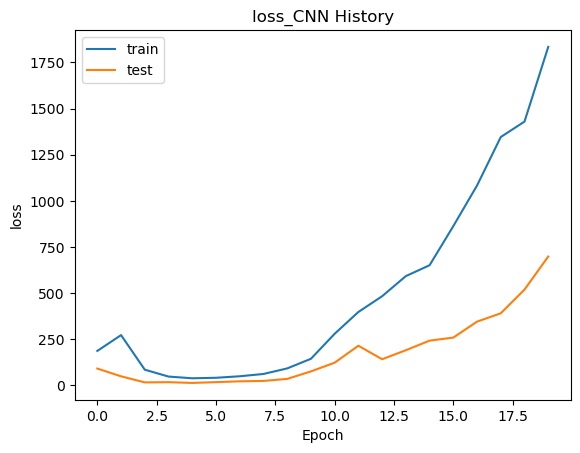

In [48]:
CNN_train_history('loss','val_loss','loss_CNN History','loss')

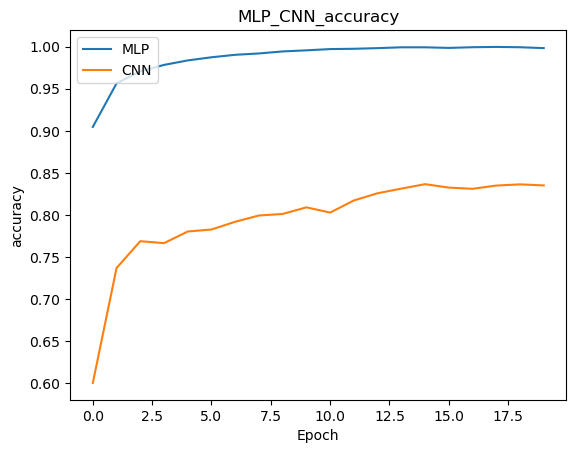

In [54]:
def MLP_CNN_history(train_acc,title,ylabel):
    plt.clf()
    plt.plot(MLP_history.history[train_acc])
    plt.plot(CNN_history.history[train_acc])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['MLP', 'CNN'], loc='upper left')
    plt.show()
MLP_CNN_history('accuracy','MLP_CNN_accuracy','accuracy')

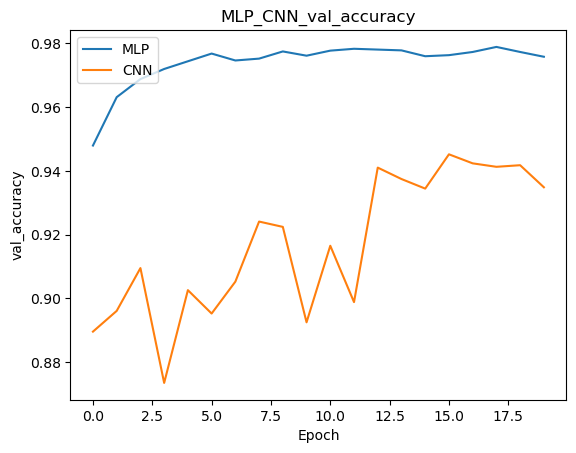

In [55]:
MLP_CNN_history('val_accuracy','MLP_CNN_val_accuracy','val_accuracy')

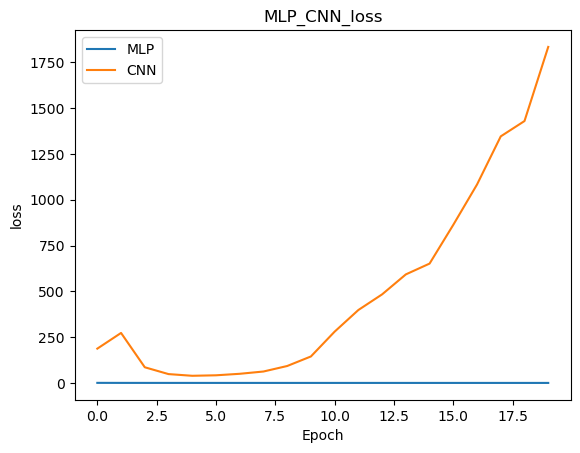

In [58]:
def MLP_CNN_loss_history(test_acc,title,ylabel):
    plt.clf()
    plt.plot(MLP_history.history[test_acc])
    plt.plot(CNN_history.history[test_acc])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['MLP', 'CNN'], loc='upper left')
    plt.show()
MLP_CNN_loss_history('loss','MLP_CNN_loss','loss')

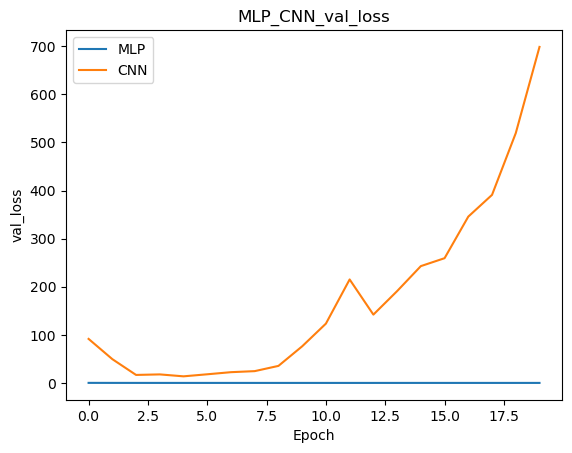

In [59]:
MLP_CNN_loss_history('val_loss','MLP_CNN_val_loss','val_loss')